### combination between adam and mini_batch then with stochaistic multivariable gradient descent

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

##### read and prepare data

In [250]:
data = np.loadtxt("../MultipleLR.csv", delimiter=",")
X = data[:, 0:3]
ones = np.ones(len(X))
X = np.insert(X, 0, ones, axis=1)
y = data[:, -1]
print(f"X size = {X.shape}")
print(f"y size = {y.shape}")

X size = (25, 4)
y size = (25,)


#### Adam in mini batch

In [475]:
def adam_mini_batch(X, y, alpha, beta1, beta2, epsilon, iterations, batch_size):
    m, n = X.shape
    thetas = np.zeros((n, 1))
    v = 0
    m_adam = 0
    J = []
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        inner_count = 0
        for i in range(0, m, batch_size):

            x_batched = X[i : i + batch_size]
            y_batched = y[i : i + batch_size]

            hyp = np.dot(x_batched, thetas)
            
            error = hyp - y_batched.reshape(len(y_batched), 1)
            cost = np.sum((error)**2) / (2*len(y_batched))
            J.append(cost)
            
            gradient = np.sum(x_batched.T @ error) / len(y_batched)

            m_adam = (beta1 * m_adam) + ((1 - beta1) * gradient)
            v = (beta2 * v) + ((1 - beta2) * gradient**2)

            bias = inner_count + 1
            m_adam = m_adam / (1 - beta1**bias)
            v = v / (1 - beta2**bias)
            thetas = thetas - ((alpha * m_adam) / (np.sqrt(v) + epsilon))
            inner_count += 1
            
        if abs(old_cost - cost) < 1e-3:
            break
        old_cost = cost
        counter += 1
    y_predicted = X @ thetas
    return J, counter, y_predicted

In [476]:
J, counter, y_predicted = adam_mini_batch(X, y, 0.1, 0.2, 0.5, 1e-8, 1000, 5)
print(f"epochs = {counter}")
print(f"r2_score = {r2_score(y_predicted, y)}")

epochs = 19
r2_score = 0.9528756927122759


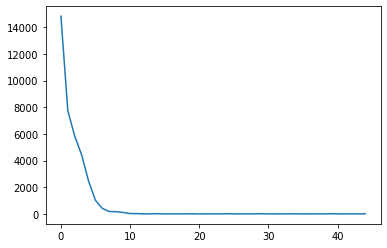

In [253]:
plt.plot(J)

### Adam in stochastic

In [517]:
def adam_stochastic(X, y, alpha, beta1, beta2, epsilon, iterations):
    m, n = X.shape
    thetas = np.zeros((n, 1))
    v = 0
    m_adam = 0
    J = []
    old_cost = 0
    counter = 0
    for _ in range(iterations):
        inner_count = 0
        for i in range(0, m):
            hyp = np.dot(X[i].reshape(1, n), thetas)
            
            error = hyp - y[i]
            cost = error**2
            J.append(cost)
            
            gradient = (X[i].reshape(1, n).T @ error) * 2

            m_adam = (beta1 * m_adam) + ((1 - beta1) * gradient)
            v = (beta2 * v) + ((1 - beta2) * gradient**2)
            
            bias = inner_count + 1
            m_adam = m_adam / (1 - (beta1)**bias)
            v = v / (1 - (beta2)**bias)
            thetas = thetas - ((alpha * m_adam) / (np.sqrt(v) + epsilon))
            inner_count += 1

        if abs(old_cost - cost) < 1e-3:
            break
        old_cost = cost
        counter += 1
    y_predicted = X @ thetas
    return J, counter, y_predicted

In [518]:
J, counter, y_predicted = adam_stochastic(X, y, 0.001, 0.1, 0.4, 1e-8, 1000)
print(f"iterations = {counter}")
print(f"r2_score = {r2_score(y_predicted, y)}")

iterations = 34
r2_score = 0.9773679525401266
